In [1]:
#Problem 1
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X_original = iris.data  # Original features
y = iris.target         # Labels (target)

# Define two new features (e.g., addition and multiplication of original features)
new_feature_1 = X_original[:, 0] + X_original[:, 1]  # Sepal length + Sepal width
new_feature_2 = X_original[:, 2] * X_original[:, 3]  # Petal length * Petal width

# Create a new feature matrix using the new features
X_new = np.column_stack((new_feature_1, new_feature_2))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier using new features: {accuracy * 100:.2f}%")


Accuracy of the SVM classifier using new features: 100.00%


Accuracy: 98.68%
Number of correctly classified 6's: 949


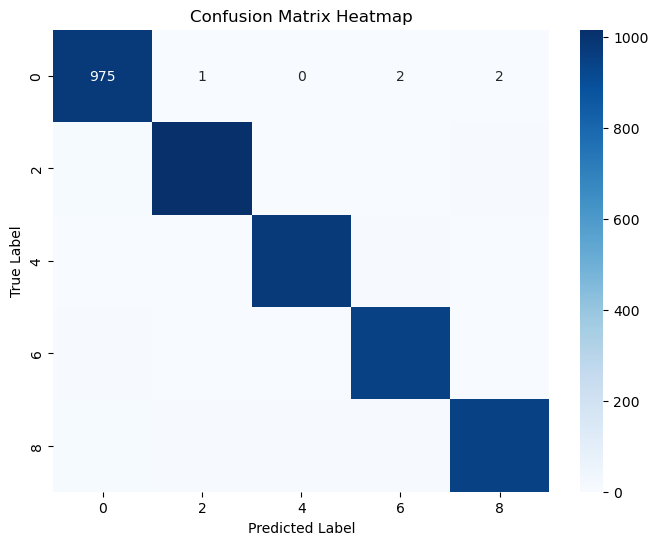

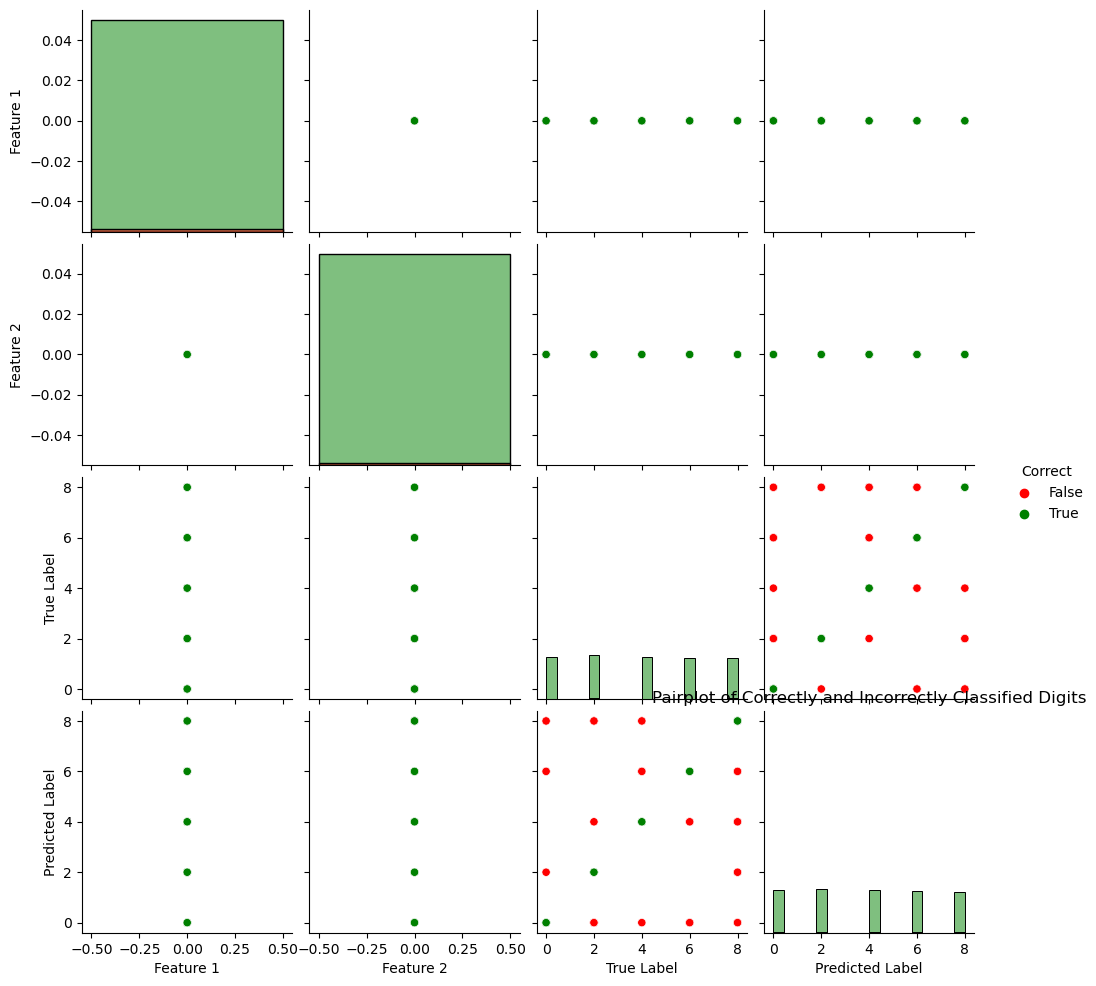

In [5]:
#Problem 2
# Import necessary libraries
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images into 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Filter even digits (0, 2, 4, 6, 8)
even_digits = [0, 2, 4, 6, 8]
train_filter = np.isin(y_train, even_digits)
test_filter = np.isin(y_test, even_digits)

X_train_even = X_train[train_filter]
y_train_even = y_train[train_filter]
X_test_even = X_test[test_filter]
y_test_even = y_test[test_filter]

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_even, y_train_even)

# Make predictions
y_pred = knn.predict(X_test_even)

# Evaluate the classifier
accuracy = accuracy_score(y_test_even, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_even, y_pred, labels=even_digits)

# How many 6's were correctly classified
correct_sixes = conf_matrix[even_digits.index(6), even_digits.index(6)]
print(f"Number of correctly classified 6's: {correct_sixes}")

# Heatmap visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=even_digits, yticklabels=even_digits)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Pairplot visualization of correctly and incorrectly classified digits
# (For simplicity, we will use the first two features for the plot)
df = pd.DataFrame(X_test_even[:, :2], columns=['Feature 1', 'Feature 2'])
df['True Label'] = y_test_even
df['Predicted Label'] = y_pred
df['Correct'] = df['True Label'] == df['Predicted Label']

sns.pairplot(df, hue='Correct', palette={True: 'green', False: 'red'}, diag_kind='hist')
plt.title("Pairplot of Correctly and Incorrectly Classified Digits")
plt.show()


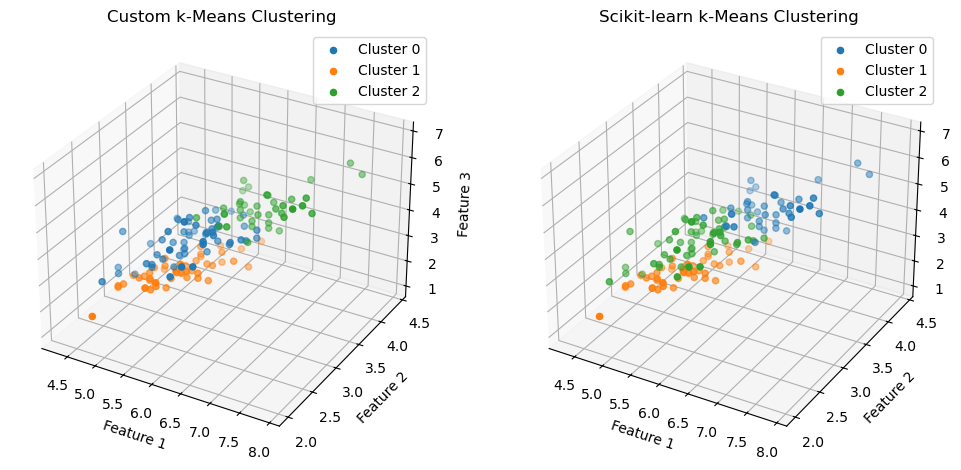

Custom k-Means with 2 clusters:
  Cluster 0: 97 points
  Cluster 1: 53 points
Custom k-Means with 3 clusters:
  Cluster 0: 60 points
  Cluster 1: 50 points
  Cluster 2: 40 points
Custom k-Means with 4 clusters:
  Cluster 0: 54 points
  Cluster 1: 50 points
  Cluster 2: 14 points
  Cluster 3: 32 points
Custom k-Means with 5 clusters:
  Cluster 0: 35 points
  Cluster 1: 50 points
  Cluster 2: 12 points
  Cluster 3: 26 points
  Cluster 4: 27 points


In [8]:
#Problem 3
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")


# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # Select three features: sepal length, sepal width, petal length
y_true = iris.target  # True labels (for comparison purposes)

# Function to implement k-means clustering
def k_means(X, n_clusters, max_iters=100, tol=1e-4):
    np.random.seed(42)
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(X.shape[0]), n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Run custom k-means
n_clusters = 3
labels_custom, centroids_custom = k_means(X, n_clusters)

# Run Scikit-learn's k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_sklearn = kmeans.fit_predict(X)

# 3D Scatter plot of custom k-means clustering
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
for i in range(n_clusters):
    ax.scatter(X[labels_custom == i, 0], X[labels_custom == i, 1], X[labels_custom == i, 2], label=f"Cluster {i}")
ax.set_title("Custom k-Means Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()

# 3D Scatter plot of sklearn k-means clustering
ax = fig.add_subplot(122, projection='3d')
for i in range(n_clusters):
    ax.scatter(X[labels_sklearn == i, 0], X[labels_sklearn == i, 1], X[labels_sklearn == i, 2], label=f"Cluster {i}")
ax.set_title("Scikit-learn k-Means Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()

plt.show()

# Experiment with varying the number of clusters
for n_clusters in [2, 3, 4, 5]:
    labels_custom, _ = k_means(X, n_clusters)
    print(f"Custom k-Means with {n_clusters} clusters:")
    for i in range(n_clusters):
        print(f"  Cluster {i}: {np.sum(labels_custom == i)} points")
